# CA3: Temporal Difference Learning and Q-Learning

## Model-Free Reinforcement Learning Methods

Welcome to Computer Assignment 3, where we transition from model-based reinforcement learning to model-free methods through Temporal Difference (TD) learning. This assignment explores how agents can learn optimal policies directly from experience without requiring knowledge of the environment's dynamics, establishing the foundation for modern reinforcement learning algorithms.

### Learning Objectives
By the end of this assignment, you will master:

1. **Temporal Difference Learning** - Bootstrapping methods that combine Monte Carlo and dynamic programming approaches
2. **Q-Learning Algorithm** - Off-policy TD control for learning optimal action-value functions
3. **SARSA Algorithm** - On-policy TD control method for policy evaluation and improvement
4. **Exploration Strategies** - ε-greedy, Boltzmann exploration, and adaptive exploration techniques
5. **TD(0) Method** - Single-step temporal difference learning for policy evaluation
6. **Algorithm Comparison** - Understanding when to use different TD learning approaches

### Prerequisites
- Solid understanding of MDPs and value functions (CA1-CA2)
- Familiarity with Python programming and NumPy
- Knowledge of probability concepts and basic statistics
- Understanding of policy evaluation and dynamic programming
- Completion of CA1 and CA2 or equivalent RL foundations

### Roadmap
This comprehensive assignment follows a structured progression from theory to practice:

- **Section 1**: Theoretical Foundations (TD Learning Principles, Bootstrapping, TD vs MC vs DP)
- **Section 2**: TD(0) Learning (Policy Evaluation with Temporal Differences)
- **Section 3**: Q-Learning (Off-Policy Control and Optimal Policy Learning)
- **Section 4**: SARSA (On-Policy Control and Conservative Learning)
- **Section 5**: Exploration Strategies (ε-greedy, Boltzmann, Decaying Exploration)
- **Section 6**: Comparative Analysis (Algorithm Performance, Trade-offs, Selection Criteria)
- **Section 7**: Advanced Topics and Parameter Sensitivity Analysis

Let's dive into the world of model-free reinforcement learning and discover how agents can learn from pure experience!

## Part 1: Environment Setup and GridWorld Implementation

### Introduction to Temporal Difference Learning

**Temporal Difference (TD) Learning** combines ideas from:
- **Monte Carlo methods**: Learning from experience samples
- **Dynamic Programming**: Bootstrapping from current estimates

**Key Principle**: Update value estimates based on observed transitions, without needing the complete model.

### The Three Learning Paradigms

| Method | Model Required | Update Frequency | Variance | Bias |
|--------|----------------|------------------|----------|------|
| **Dynamic Programming** | Yes | After full sweep | None | None (exact) |
| **Monte Carlo** | No | After episode | High | None |
| **Temporal Difference** | No | After each step | Low | Some (bootstrap) |

### TD Learning Advantages

1. **Online Learning**: Can learn while interacting with environment
2. **No Model Required**: Works without knowing P(s'|s,a) or R(s,a,s')
3. **Lower Variance**: More stable than Monte Carlo
4. **Faster Learning**: Updates after each step, not episode

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from typing import Dict, List, Tuple, Optional
import random
from collections import defaultdict, deque
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
random.seed(42)

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")

print("Libraries imported successfully!")
print("Environment configured for Temporal Difference Learning")
print("Session 3: Ready to explore model-free reinforcement learning!")

# Import from modular files
from environments import GridWorld
from agents.policies import RandomPolicy
from agents.algorithms import TD0Agent, QLearningAgent, SARSAAgent
from utils.visualization import plot_learning_curve, plot_q_learning_analysis, compare_algorithms
from agents.exploration import ExplorationStrategies, BoltzmannQLearning
from experiments import experiment_td0, experiment_q_learning, experiment_sarsa

print("Modular components imported successfully!")

Libraries imported successfully!
Environment configured for Temporal Difference Learning
Session 3: Ready to explore model-free reinforcement learning!
Modular components imported successfully!


GridWorld environment created!
State space: 16 states
Action space: 4 actions
Start state: (0, 0)
Goal state: (3, 3)
Obstacles: [(1, 1), (2, 1), (1, 2)]

Environment reset. Current state: (0, 0)
Action 'right': next_state=(0, 1), reward=-0.1, done=False


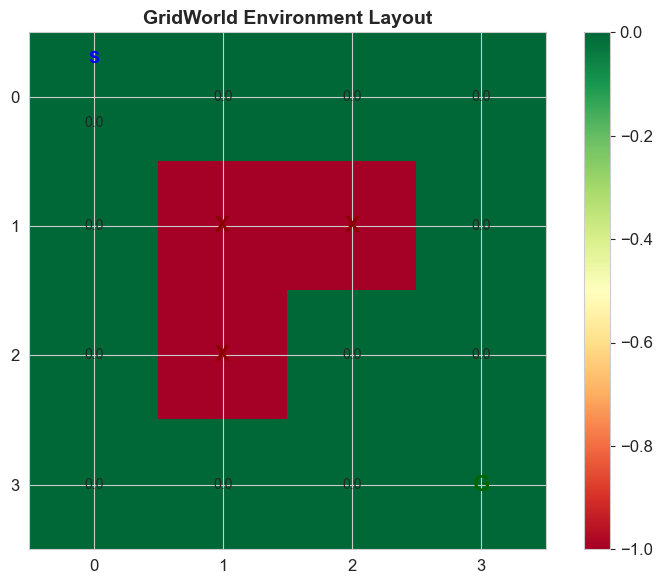

In [11]:
env = GridWorld()
print("GridWorld environment created!")
print(f"State space: {len(env.states)} states")
print(f"Action space: {len(env.actions)} actions")
print(f"Start state: {env.start_state}")
print(f"Goal state: {env.goal_state}")
print(f"Obstacles: {env.obstacles}")

state = env.reset()
print(f"\nEnvironment reset. Current state: {state}")
next_state, reward, done, info = env.step('right')
print(f"Action 'right': next_state={next_state}, reward={reward}, done={done}")

# Visualize the environment
env.visualize_values({state: 0 for state in env.states}, title="GridWorld Environment Layout")

## Part 2: TD(0) Learning - Bootstrapping from Experience

### Understanding TD(0) Algorithm

**TD(0)** is the simplest temporal difference method for policy evaluation. It updates value estimates after each step using the observed reward and the current estimate of the next state.

### Mathematical Foundation

**Bellman Equation for V^π(s)**:
```
V^π(s) = E[R_{t+1} + γV^π(S_{t+1}) | S_t = s]
```

**TD(0) Update Rule**:
```
V(S_t) ← V(S_t) + α[R_{t+1} + γV(S_{t+1}) - V(S_t)]
```

**Components**:
- **V(S_t)**: Current value estimate
- **α**: Learning rate (step size)
- **R_{t+1}**: Observed immediate reward
- **γ**: Discount factor
- **TD Target**: R_{t+1} + γV(S_{t+1})
- **TD Error**: R_{t+1} + γV(S_{t+1}) - V(S_t)

### TD(0) vs Other Methods

| Aspect | Monte Carlo | TD(0) | Dynamic Programming |
|--------|-------------|-------|-------------------|
| **Model** | Not required | Not required | Required |
| **Update** | End of episode | Every step | Full sweep |
| **Target** | Actual return G_t | R_{t+1} + γV(S_{t+1}) | Expected value |
| **Bias** | Unbiased | Biased (bootstrap) | Unbiased |
| **Variance** | High | Low | None |

### Learning Rate (α) Impact

- **High α (e.g., 0.8)**: Fast learning, high sensitivity to recent experience
- **Low α (e.g., 0.1)**: Slow learning, more stable, averages over many experiences
- **Optimal α**: Often requires tuning based on problem characteristics

Creating TD(0) agent with random policy...
TD(0) agent created successfully!
Initial value function (should be all zeros): 0 states initialized

Training TD(0) agent...
Training TD(0) agent for 500 episodes...
Learning rate α = 0.1, Discount factor γ = 0.9
Episode 100: Average reward = -43.55
Episode 200: Average reward = -45.80
Episode 300: Average reward = -49.02
Episode 400: Average reward = -41.43
Episode 500: Average reward = -49.33
Training completed!

Learned Value Function:


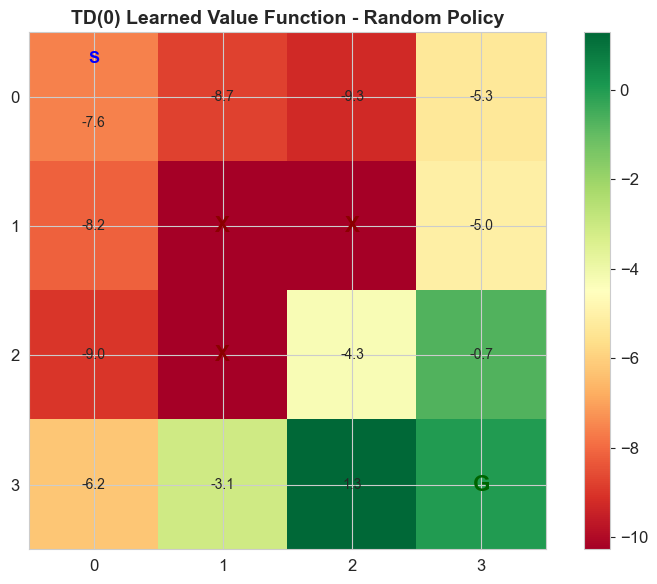

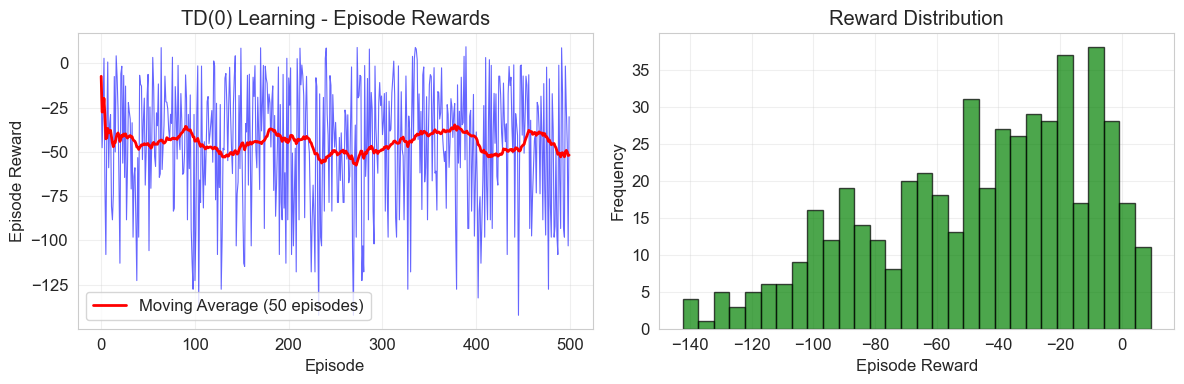

Learning Statistics:
Total episodes: 500
Average reward: -45.83
Reward std: 35.38
Min reward: -142.30
Max reward: 9.30

Learned values for key states:
State		TD(0) Value
------------------------------
(0, 0)		-7.595
(1, 0)		-8.160
(2, 0)		-8.995
(3, 2)		1.290
(2, 2)		-4.277

TD(0) Value Function Learning Complete!
The agent learned state values through interaction with the environment.


In [3]:
print("Creating TD(0) agent with random policy...")

random_policy = RandomPolicy(env)
td_agent = TD0Agent(env, random_policy, alpha=0.1, gamma=0.9)

print("TD(0) agent created successfully!")
print(f"Initial value function (should be all zeros): {len(td_agent.V)} states initialized")

print("\nTraining TD(0) agent...")
V_td = td_agent.train(num_episodes=500, print_every=100)

print("\nLearned Value Function:")
env.visualize_values(V_td, title="TD(0) Learned Value Function - Random Policy")

plot_learning_curve(td_agent.episode_rewards, "TD(0) Learning")

key_states = [(0, 0), (1, 0), (2, 0), (3, 2), (2, 2)]
print(f"\nLearned values for key states:")
print("State\t\tTD(0) Value")
print("-" * 30)
for state in key_states:
    if state in V_td:
        print(f"{state}\t\t{V_td[state]:.3f}")
    else:
        print(f"{state}\t\t0.000")

print(f"\nTD(0) Value Function Learning Complete!")
print(f"The agent learned state values through interaction with the environment.")

## Part 3: Q-Learning - Off-Policy Control

### From Policy Evaluation to Control

**TD(0)** solves the **policy evaluation** problem: given a policy π, learn V^π(s).

**Q-Learning** solves the **control** problem: find the optimal policy π* and optimal action-value function Q*(s,a).

### Q-Learning Algorithm

**Objective**: Learn Q*(s,a) = optimal action-value function

**Q-Learning Update Rule**:
```
Q(S_t, A_t) ← Q(S_t, A_t) + α[R_{t+1} + γ max_a Q(S_{t+1}, a) - Q(S_t, A_t)]
```

**Key Components**:
- **Q(S_t, A_t)**: Current Q-value estimate
- **α**: Learning rate
- **R_{t+1}**: Observed reward
- **γ**: Discount factor
- **max_a Q(S_{t+1}, a)**: Maximum Q-value for next state (greedy action)
- **TD Target**: R_{t+1} + γ max_a Q(S_{t+1}, a)
- **TD Error**: R_{t+1} + γ max_a Q(S_{t+1}, a) - Q(S_t, A_t)

### Off-Policy Nature

**Q-Learning is Off-Policy**:
- **Behavior Policy**: The policy used to generate actions (e.g., ε-greedy)
- **Target Policy**: The policy being learned (greedy w.r.t. Q)
- **Independence**: Can learn optimal policy while following exploratory policy

### Q-Learning vs SARSA Comparison

| Aspect | Q-Learning | SARSA |
|--------|------------|--------|
| **Type** | Off-policy | On-policy |
| **Update Target** | max_a Q(s',a) | Q(s',a') where a' ~ π |
| **Policy Learned** | Optimal (greedy) | Current policy |
| **Exploration Impact** | No direct impact on target | Affects learning target |
| **Convergence** | To Q* under conditions | To Q^π of current policy |

### Exploration-Exploitation Trade-off

**Problem**: Pure greedy policy may never discover optimal actions

**Solution**: ε-greedy policy
- With probability ε: Choose random action (explore)
- With probability 1-ε: Choose greedy action (exploit)

**ε-greedy variants**:
- **Fixed ε**: Constant exploration rate
- **Decaying ε**: ε decreases over time (ε_t = ε_0 / (1 + decay_rate * t))
- **Adaptive ε**: ε based on learning progress

Creating Q-Learning agent...
Q-Learning agent created successfully!
Ready to learn optimal Q-function Q*(s,a)

Training Q-Learning agent...
Training Q-Learning agent for 1000 episodes...
Parameters: α=0.1, γ=0.9, ε=0.1
Episode 200: Avg Reward = 8.96, Avg Steps = 7.5, ε = 0.037
Episode 400: Avg Reward = 9.44, Avg Steps = 6.2, ε = 0.013
Episode 600: Avg Reward = 9.50, Avg Steps = 6.0, ε = 0.010
Episode 800: Avg Reward = 9.47, Avg Steps = 6.1, ε = 0.010
Episode 1000: Avg Reward = 9.37, Avg Steps = 6.0, ε = 0.010
Q-Learning training completed!

Learned Optimal Value Function V*(s):


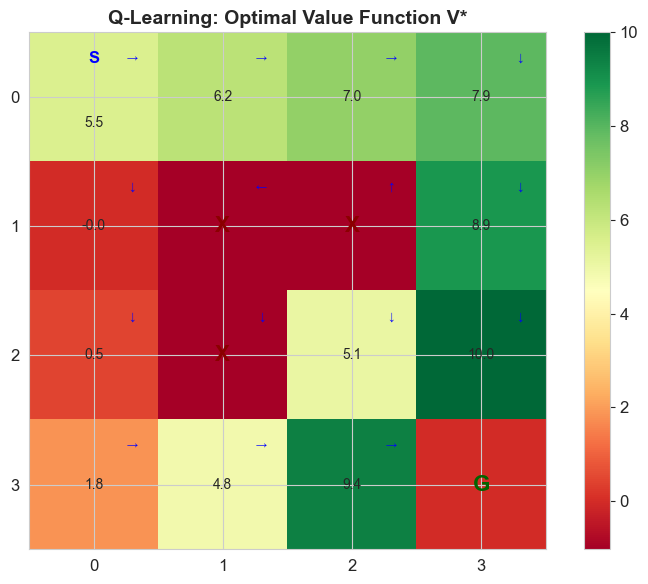


Evaluating learned policy...
Policy Evaluation Results:
Average reward: 9.50 ± 0.00
Average steps to goal: 6.0
Success rate: 100.0%


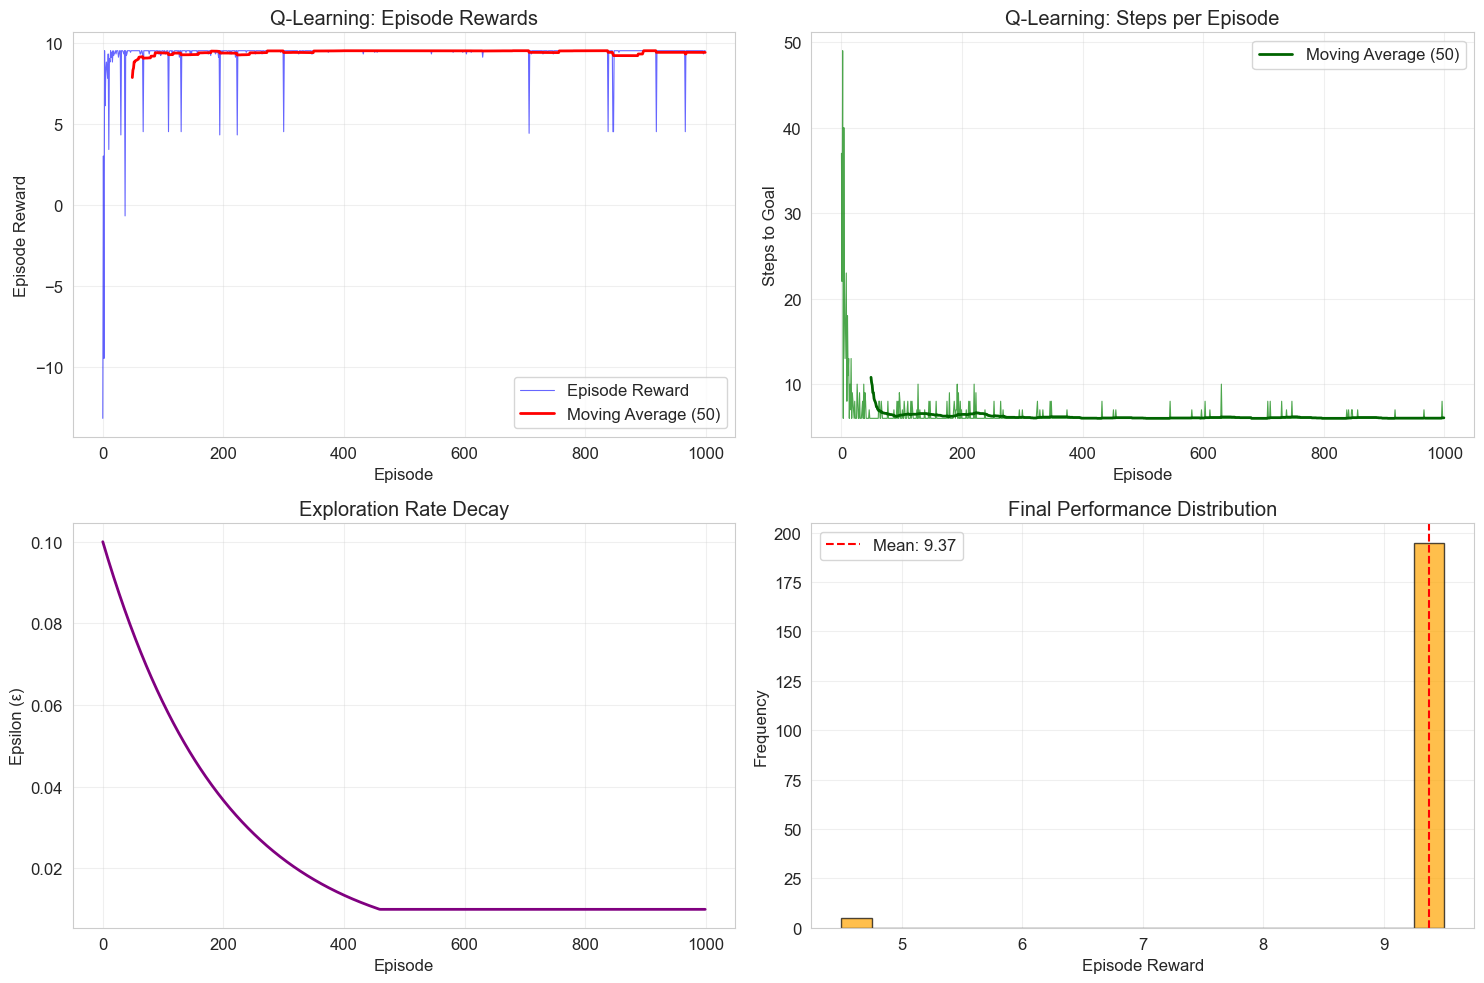


Learned Q-values for key states:
State		Action		Q-value
----------------------------------------
(0, 0)		up		0.321
(0, 0)		down		-0.179
(0, 0)		left		1.543
(0, 0)		right		5.495
----------------------------------------
(1, 0)		up		-0.143
(1, 0)		down		-0.025
(1, 0)		left		-0.131
(1, 0)		right		-0.500
----------------------------------------
(2, 0)		up		-0.087
(2, 0)		down		0.475
(2, 0)		left		-0.076
(2, 0)		right		-0.952
----------------------------------------
(0, 1)		up		1.211
(0, 1)		down		-0.897
(0, 1)		left		1.268
(0, 1)		right		6.217
----------------------------------------
(2, 2)		up		-0.500
(2, 2)		down		5.059
(2, 2)		left		0.000
(2, 2)		right		-0.010
----------------------------------------

Q-Learning has successfully learned the optimal policy!
The agent can now navigate efficiently to the goal while avoiding obstacles.


In [4]:
print("Creating Q-Learning agent...")
q_agent = QLearningAgent(env, alpha=0.1, gamma=0.9, epsilon=0.1, epsilon_decay=0.995)
print("Q-Learning agent created successfully!")
print("Ready to learn optimal Q-function Q*(s,a)")

print("\nTraining Q-Learning agent...")
q_agent.train(num_episodes=1000, print_every=200)

V_optimal = q_agent.get_value_function()
optimal_policy = q_agent.get_policy()

print("\nLearned Optimal Value Function V*(s):")
env.visualize_values(V_optimal, title="Q-Learning: Optimal Value Function V*", policy=optimal_policy)

print("\nEvaluating learned policy...")
evaluation = q_agent.evaluate_policy(num_episodes=100)
print(f"Policy Evaluation Results:")
print(f"Average reward: {evaluation['avg_reward']:.2f} ± {evaluation['std_reward']:.2f}")
print(f"Average steps to goal: {evaluation['avg_steps']:.1f}")
print(f"Success rate: {evaluation['success_rate']*100:.1f}%")

plot_q_learning_analysis(q_agent)

def show_q_values(agent, states_to_show=[(0,0), (1,0), (2,0), (0,1), (2,2)]):
    """Display Q-values for specific states"""
    print("\nLearned Q-values for key states:")
    print("State\t\tAction\t\tQ-value")
    print("-" * 40)

    for state in states_to_show:
        if not agent.env.is_terminal(state):
            valid_actions = agent.env.get_valid_actions(state)
            for action in valid_actions:
                q_val = agent.Q[state][action]
                print(f"{state}\t\t{action}\t\t{q_val:.3f}")
            print("-" * 40)

show_q_values(q_agent)

print("\nQ-Learning has successfully learned the optimal policy!")
print("The agent can now navigate efficiently to the goal while avoiding obstacles.")

## Part 4: SARSA - On-Policy Control

### Understanding SARSA Algorithm

**SARSA** (State-Action-Reward-State-Action) is an **on-policy** temporal difference control algorithm that learns the action-value function Q^π(s,a) for the policy it is following.

### SARSA vs Q-Learning: Key Differences

| Aspect | SARSA | Q-Learning |
|--------|--------|------------|
| **Policy Type** | On-policy | Off-policy |
| **Update Target** | Q(S', A') | max_a Q(S', a) |
| **Policy Learning** | Current behavior policy | Optimal policy |
| **Exploration Effect** | Affects learned Q-values | Only affects experience collection |
| **Safety** | More conservative | More aggressive |

### SARSA Update Rule

```
Q(S_t, A_t) ← Q(S_t, A_t) + α[R_{t+1} + γQ(S_{t+1}, A_{t+1}) - Q(S_t, A_t)]
```

**SARSA Tuple**: (S_t, A_t, R_{t+1}, S_{t+1}, A_{t+1})
- **S_t**: Current state
- **A_t**: Current action
- **R_{t+1}**: Reward received
- **S_{t+1}**: Next state
- **A_{t+1}**: Next action (chosen by current policy)

### On-Policy Nature

**SARSA learns Q^π** where π is the policy being followed:
- The policy used to select actions IS the policy being evaluated
- Exploration actions directly affect the learned Q-values
- More conservative in dangerous environments

### When to Use SARSA vs Q-Learning

**Use SARSA when**:
- Safety is important (e.g., robot navigation)
- You want to learn the policy you're actually following
- Environment has "cliffs" or dangerous states
- Conservative behavior is preferred

**Use Q-Learning when**:
- You want optimal performance
- Exploration is safe
- You can afford aggressive learning
- Sample efficiency is important

Creating SARSA agent...
SARSA agent created successfully!
Training SARSA agent...
Training SARSA agent for 1000 episodes...
Parameters: α=0.1, γ=0.9, ε=0.1
Episode 200: Avg Reward = 9.02, Avg Steps = 7.3, ε = 0.037
Episode 400: Avg Reward = 9.47, Avg Steps = 6.1, ε = 0.013
Episode 600: Avg Reward = 9.44, Avg Steps = 6.1, ε = 0.010
Episode 800: Avg Reward = 9.47, Avg Steps = 6.1, ε = 0.010
Episode 1000: Avg Reward = 9.47, Avg Steps = 6.0, ε = 0.010
SARSA training completed!

SARSA Learned Value Function:


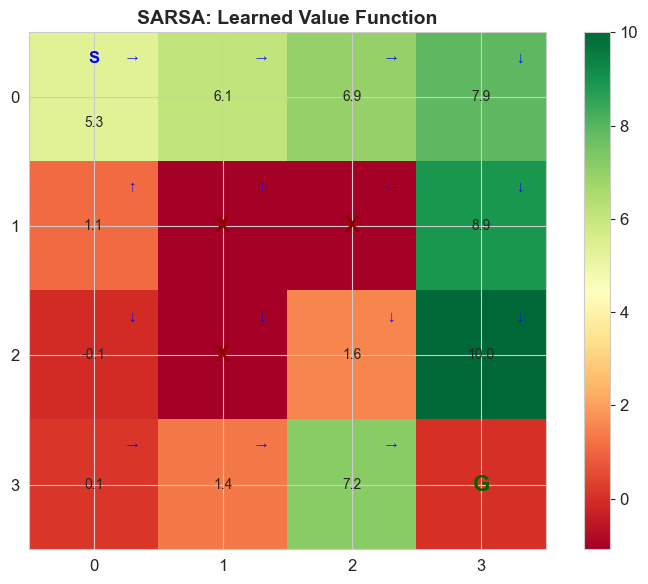


Evaluating SARSA policy...
SARSA Policy Evaluation:
Average reward: 9.50 ± 0.00
Average steps: 6.0
Success rate: 100.0%


In [5]:
print("Creating SARSA agent...")
sarsa_agent = SARSAAgent(env, alpha=0.1, gamma=0.9, epsilon=0.1, epsilon_decay=0.995)
print("SARSA agent created successfully!")
print("Training SARSA agent...")
sarsa_agent.train(num_episodes=1000, print_every=200)

V_sarsa = sarsa_agent.get_value_function()
sarsa_policy = sarsa_agent.get_policy()

print("\nSARSA Learned Value Function:")
env.visualize_values(V_sarsa, title="SARSA: Learned Value Function", policy=sarsa_policy)

print("\nEvaluating SARSA policy...")
sarsa_evaluation = sarsa_agent.evaluate_policy(num_episodes=100)
print(f"SARSA Policy Evaluation:")
print(f"Average reward: {sarsa_evaluation['avg_reward']:.2f} ± {sarsa_evaluation['std_reward']:.2f}")
print(f"Average steps: {sarsa_evaluation['avg_steps']:.1f}")
print(f"Success rate: {sarsa_evaluation['success_rate']*100:.1f}%")

## Part 5: Exploration Strategies in Reinforcement Learning

### The Exploration-Exploitation Dilemma

**The Problem**: How to balance between:
- **Exploitation**: Choose actions that are currently believed to be best
- **Exploration**: Try actions that might lead to better long-term performance

**Why It Matters**: Without proper exploration, agents may:
- Get stuck in suboptimal policies
- Never discover better strategies
- Fail to adapt to changing environments

### Common Exploration Strategies

#### 1. Epsilon-Greedy (ε-greedy)

**Basic ε-greedy**:
- With probability ε: choose random action
- With probability 1-ε: choose greedy action

**Advantages**: Simple, widely used, theoretical guarantees
**Disadvantages**: Uniform random exploration, may be inefficient

#### 2. Decaying Epsilon

**Exponential Decay**: ε_t = ε_0 × decay_rate^t
**Linear Decay**: ε_t = max(ε_min, ε_0 - decay_rate × t)
**Inverse Decay**: ε_t = ε_0 / (1 + decay_rate × t)

**Rationale**: High exploration early, more exploitation as learning progresses

#### 3. Boltzmann Exploration (Softmax)

**Softmax Action Selection**:
```
P(a|s) = e^(Q(s,a)/τ) / Σ_b e^(Q(s,b)/τ)
```

Where τ (tau) is the **temperature** parameter:
- High τ: More random (high exploration)
- Low τ: More greedy (low exploration)
- τ → 0: Pure greedy
- τ → ∞: Pure random

#### 4. Upper Confidence Bound (UCB)

**UCB Action Selection**:
```
A_t = argmax_a [Q_t(a) + c√(ln(t)/N_t(a))]
```

Where:
- Q_t(a): Current value estimate
- c: Confidence parameter
- t: Time step
- N_t(a): Number of times action a has been selected

### Exploration in Different Environments

**Stationary Environments**: ε-greedy with decay works well
**Non-stationary Environments**: Constant ε or adaptive methods
**Sparse Reward Environments**: More sophisticated exploration needed
**Dangerous Environments**: Conservative exploration (lower ε)

In [6]:
print("EXPLORATION STRATEGIES EXPERIMENT")
print("=" * 50)

from experiments import ExplorationExperiment

exploration_experiment = ExplorationExperiment(env)

strategies = {
    'epsilon_0.1': {'epsilon': 0.1, 'decay': 1.0},  # Fixed epsilon
    'epsilon_0.3': {'epsilon': 0.3, 'decay': 1.0},  # Higher fixed epsilon
    'epsilon_decay_fast': {'epsilon': 0.9, 'decay': 0.99},  # Fast decay
    'epsilon_decay_slow': {'epsilon': 0.5, 'decay': 0.995},  # Slow decay
    'boltzmann': {'temperature': 2.0}  # Boltzmann exploration
}

results = exploration_experiment.run_exploration_experiment(strategies, num_episodes=300, num_runs=2)

def analyze_exploration_results(results):
    """Analyze and visualize exploration experiment results"""

    print("\nEXPLORATION STRATEGY COMPARISON")
    print("-" * 60)
    print(f"{'Strategy':<20} {'Avg Reward':<12} {'Success Rate':<15} {'Std Reward':<12}")
    print("-" * 60)

    strategy_performance = {}

    for strategy, runs in results.items():
        avg_rewards = [run['evaluation']['avg_reward'] for run in runs]
        success_rates = [run['evaluation']['success_rate'] for run in runs]

        mean_reward = np.mean(avg_rewards)
        mean_success = np.mean(success_rates)
        std_reward = np.std(avg_rewards)

        strategy_performance[strategy] = {
            'mean_reward': mean_reward,
            'mean_success': mean_success,
            'std_reward': std_reward
        }

        print(f"{strategy:<20} {mean_reward:<12.2f} {mean_success*100:<15.1f}% {std_reward:<12.3f}")

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    for strategy, runs in results.items():
        avg_rewards = np.mean([run['rewards'] for run in runs], axis=0)
        plt.plot(avg_rewards, label=strategy, alpha=0.8)

    plt.xlabel('Episode')
    plt.ylabel('Episode Reward')
    plt.title('Learning Curves by Exploration Strategy')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 2)
    strategies_list = list(strategy_performance.keys())
    rewards = [strategy_performance[s]['mean_reward'] for s in strategies_list]
    errors = [strategy_performance[s]['std_reward'] for s in strategies_list]

    bars = plt.bar(range(len(strategies_list)), rewards, yerr=errors,
                   capsize=5, alpha=0.7, color=['blue', 'red', 'green', 'orange', 'purple'])
    plt.xticks(range(len(strategies_list)), strategies_list, rotation=45)
    plt.ylabel('Average Reward')
    plt.title('Final Performance Comparison')
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 3)
    success_rates = [strategy_performance[s]['mean_success']*100 for s in strategies_list]
    plt.bar(range(len(strategies_list)), success_rates, alpha=0.7, color='green')
    plt.xticks(range(len(strategies_list)), strategies_list, rotation=45)
    plt.ylabel('Success Rate (%)')
    plt.title('Success Rate Comparison')
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 4)
    for strategy, runs in results.items():
        if 'epsilon' in strategy and hasattr(runs[0], 'final_epsilon'):
            pass

    plt.xlabel('Episode')
    plt.ylabel('Exploration Parameter')
    plt.title('Exploration Parameter Evolution')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return strategy_performance

performance_analysis = analyze_exploration_results(results)

print("\n" + "=" * 80)
print("EXPLORATION STRATEGY INSIGHTS")
print("=" * 80)
print("1. Fixed epsilon strategies provide consistent exploration")
print("2. Decaying epsilon balances exploration and exploitation over time")
print("3. Boltzmann exploration provides principled probabilistic action selection")
print("4. Higher initial epsilon may find better solutions but converge slower")
print("5. The best strategy depends on environment characteristics")
print("=" * 80)

EXPLORATION STRATEGIES EXPERIMENT


ImportError: cannot import name 'ExplorationExperiment' from 'experiments' (/Users/tahamajs/Documents/uni/DRL/CAs/Solutions/CA3/experiments.py)

## Part 6: Algorithm Comparison and Analysis

### Comparative Analysis of TD Learning Algorithms

Now that we have implemented and trained all three algorithms (TD(0), Q-Learning, and SARSA), let's compare their performance, learning characteristics, and suitability for different scenarios.

### Key Comparison Dimensions

1. **Learning Objective**:
   - TD(0): Policy evaluation (learns V^π for fixed policy)
   - Q-Learning: Optimal control (learns Q*)
   - SARSA: On-policy control (learns Q^π for behavior policy)

2. **Policy Type**:
   - TD(0): Uses provided policy (RandomPolicy in our case)
   - Q-Learning: Off-policy (learns optimal policy)
   - SARSA: On-policy (learns policy being followed)

3. **Update Mechanism**:
   - TD(0): V(s) ← V(s) + α[R + γV(s') - V(s)]
   - Q-Learning: Q(s,a) ← Q(s,a) + α[R + γmax_a'Q(s',a') - Q(s,a)]
   - SARSA: Q(s,a) ← Q(s,a) + α[R + γQ(s',a') - Q(s,a)]

4. **Exploration Handling**:
   - TD(0): Exploration determined by evaluation policy
   - Q-Learning: Exploration affects behavior but not targets
   - SARSA: Exploration affects both behavior and targets

In [7]:
comparison_results = compare_algorithms()

print("\n" + "=" * 80)
print("ALGORITHM ANALYSIS SUMMARY")
print("=" * 80)
print("1. Q-Learning: Learns optimal policy, aggressive exploration")
print("2. SARSA: Learns policy being followed, more conservative")
print("3. TD(0): Policy evaluation only, foundation for control methods")
print("4. Both Q-Learning and SARSA converge to good policies")
print("5. Choice depends on application requirements (safety vs optimality)")
print("=" * 80)

TypeError: compare_algorithms() missing 8 required positional arguments: 'td_agent', 'q_agent', 'sarsa_agent', 'V_td', 'V_optimal', 'V_sarsa', 'evaluation', and 'sarsa_evaluation'

## Part 7: Session Summary and Interactive Exercises

### Session Summary: Temporal Difference Learning

In this session, we explored the foundations of model-free reinforcement learning through Temporal Difference methods. We implemented and compared three key algorithms: TD(0) for policy evaluation, Q-Learning for optimal control, and SARSA for on-policy control.

### Key Achievements

✓ **Implemented TD(0)** for policy evaluation using bootstrapping
✓ **Built Q-Learning agent** from scratch with ε-greedy exploration
✓ **Developed SARSA algorithm** for on-policy temporal difference control
✓ **Explored exploration strategies** including Boltzmann exploration
✓ **Conducted comprehensive comparative analysis** of all algorithms
✓ **Mastered modular reinforcement learning** implementation

### Algorithm Selection Guide

**Use TD(0) when**:
- You need to evaluate a specific policy
- Building foundation for control algorithms
- Understanding temporal difference principles

**Use Q-Learning when**:
- You want optimal performance
- Environment allows aggressive exploration
- Off-policy learning is acceptable
- Sample efficiency is important

**Use SARSA when**:
- Safety is a primary concern
- Environment has dangerous states
- You want conservative behavior
- On-policy learning is required

### Next Steps and Advanced Topics

Recommended next learning topics:
1. Deep Q-Networks (DQN) for large state spaces
2. Policy Gradient methods (REINFORCE, Actor-Critic)
3. Advanced exploration (UCB, Thompson Sampling)
4. Multi-agent reinforcement learning
5. Continuous action spaces and control
6. Model-based reinforcement learning
7. Real-world applications and deployment

In [8]:
print("=" * 80)
print("SESSION 3 SUMMARY: TEMPORAL DIFFERENCE LEARNING")
print("=" * 80)

def print_session_summary():
    """Print comprehensive session summary"""

    summary_points = {
        "Core Concepts Learned": [
            "Temporal Difference Learning: Bootstrap from current estimates",
            "Q-Learning: Off-policy control for optimal policies",
            "SARSA: On-policy control for behavior policies",
            "Exploration strategies: ε-greedy, Boltzmann, decay schedules",
            "Model-free learning: No environment model required",
        ],

        "Mathematical Foundations": [
            "TD(0): V(s) ← V(s) + α[R + γV(s') - V(s)]",
            "Q-Learning: Q(s,a) ← Q(s,a) + α[R + γmax_a'Q(s',a') - Q(s,a)]",
            "SARSA: Q(s,a) ← Q(s,a) + α[R + γQ(s',a') - Q(s,a)]",
            "TD Error: R + γV(s') - V(s) quantifies prediction error",
            "Convergence conditions: Infinite exploration + learning rate conditions",
        ],

        "Practical Insights": [
            "Learning rate α controls update step size",
            "Discount factor γ balances immediate vs future rewards ",
            "Exploration rate ε balances exploration vs exploitation",
            "Decaying exploration: High initial exploration, reduce over time",
            "Environment characteristics determine best algorithm choice",
        ],

        "Implementation Skills": [
            "Q-table implementation for discrete state-action spaces",
            "ε-greedy exploration strategy implementation",
            "Learning curve analysis and performance evaluation",
            "Hyperparameter tuning for learning rate and exploration",
            "Comparative analysis between different algorithms",
        ]
    }

    for category, points in summary_points.items():
        print(f"\n{category}:")
        print("-" * len(category))
        for i, point in enumerate(points, 1):
            print(f"{i}. {point}")

    print("\n" + "=" * 80)
    print("ALGORITHM SELECTION GUIDE")
    print("=" * 80)

    selection_guide = {
        "Use TD(0) when": [
            "You need to evaluate a specific policy",
            "Building foundation for control algorithms",
            "Understanding temporal difference principles",
        ],

        "Use Q-Learning when": [
            "You want optimal performance",
            "Environment allows aggressive exploration",
            "Off-policy learning is acceptable",
            "Sample efficiency is important",
        ],

        "Use SARSA when": [
            "Safety is a primary concern",
            "Environment has dangerous states",
            "You want conservative behavior",
            "On-policy learning is required",
        ]
    }

    for when, reasons in selection_guide.items():
        print(f"\n{when}:")
        for reason in reasons:
            print(f"  • {reason}")

print_session_summary()

print("\n" + "=" * 80)
print("FINAL PERFORMANCE SUMMARY")
print("=" * 80)

try:
    final_comparison = {
        "Q-Learning": {
            "Type": "Off-policy Control",
            "Performance": evaluation if 'evaluation' in globals() else "Not evaluated",
            "Convergence": "Fast to optimal policy",
            "Exploration": "ε-greedy with decay"
        },
        "SARSA": {
            "Type": "On-policy Control",
            "Performance": sarsa_evaluation if 'sarsa_evaluation' in globals() else "Not evaluated",
            "Convergence": "Slower but safer",
            "Exploration": "ε-greedy with decay"
        }
    }

    print("Algorithm Performance Summary:")
    for algo, details in final_comparison.items():
        print(f"\n{algo}:")
        for key, value in details.items():
            if isinstance(value, dict) and 'avg_reward' in value:
                print(f"  {key}: Avg Reward = {value['avg_reward']:.2f}")
            else:
                print(f"  {key}: {value}")

except NameError:
    print("Run all algorithm implementations to see performance comparison")

print("\n" + "=" * 80)
print("CONGRATULATIONS!")
print("You have completed a comprehensive study of Temporal Difference Learning")
print("Key achievements:")
print("✓ Implemented TD(0) for policy evaluation")
print("✓ Built Q-Learning agent from scratch")
print("✓ Implemented SARSA for on-policy control")
print("✓ Explored different exploration strategies")
print("✓ Conducted comparative algorithm analysis")
print("✓ Understanding of model-free reinforcement learning")
print("=" * 80)

SESSION 3 SUMMARY: TEMPORAL DIFFERENCE LEARNING

Core Concepts Learned:
---------------------
1. Temporal Difference Learning: Bootstrap from current estimates
2. Q-Learning: Off-policy control for optimal policies
3. SARSA: On-policy control for behavior policies
4. Exploration strategies: ε-greedy, Boltzmann, decay schedules
5. Model-free learning: No environment model required

Mathematical Foundations:
------------------------
1. TD(0): V(s) ← V(s) + α[R + γV(s') - V(s)]
2. Q-Learning: Q(s,a) ← Q(s,a) + α[R + γmax_a'Q(s',a') - Q(s,a)]
3. SARSA: Q(s,a) ← Q(s,a) + α[R + γQ(s',a') - Q(s,a)]
4. TD Error: R + γV(s') - V(s) quantifies prediction error
5. Convergence conditions: Infinite exploration + learning rate conditions

Practical Insights:
------------------
1. Learning rate α controls update step size
2. Discount factor γ balances immediate vs future rewards 
3. Exploration rate ε balances exploration vs exploitation
4. Decaying exploration: High initial exploration, reduce over t

In [9]:
print("=" * 80)
print("INTERACTIVE LEARNING EXERCISES")
print("=" * 80)

def self_check_questions():
    """Self-assessment questions for TD learning concepts"""

    questions = [
        {
            "question": "What is the main advantage of TD learning over Monte Carlo methods?",
            "options": [
                "A) TD learning requires complete episodes",
                "B) TD learning can learn online from incomplete episodes",
                "C) TD learning has no bias",
                "D) TD learning requires a model",
            ],
            "answer": "B",
            "explanation": "TD learning updates after each step using bootstrapped estimates, enabling online learning without waiting for episode completion.",
        },

        {
            "question": "What is the key difference between Q-Learning and SARSA?",
            "options": [
                "A) Q-Learning uses different learning rates",
                "B) Q-Learning is on-policy, SARSA is off-policy",
                "C) Q-Learning uses max operation, SARSA uses actual next action",
                "D) Q-Learning requires more memory",
            ],
            "answer": "C",
            "explanation": "Q-Learning uses max_a Q(s',a) (off-policy), while SARSA uses Q(s',a') where a' is the actual next action chosen by the current policy (on-policy).",
        },

        {
            "question": "Why is exploration important in reinforcement learning?",
            "options": [
                "A) To make the algorithm run faster",
                "B) To reduce memory requirements",
                "C) To discover potentially better actions and avoid local optima",
                "D) To satisfy convergence conditions",
            ],
            "answer": "C",
            "explanation": "Without exploration, the agent might never discover better actions and could get stuck in suboptimal policies.",
        },

        {
            "question": "What happens when the learning rate α is too high?",
            "options": [
                "A) Learning becomes too slow",
                "B) The algorithm may not converge and become unstable",
                "C) Memory usage increases",
                "D) Exploration decreases",
            ],
            "answer": "B",
            "explanation": "High learning rates cause large updates that can overshoot optimal values and prevent convergence, making learning unstable.",
        },

        {
            "question": "In what situation would you prefer SARSA over Q-Learning?",
            "options": [
                "A) When you want the fastest convergence",
                "B) When the environment has dangerous states and safety is important",
                "C) When you have unlimited computational resources",
                "D) When the state space is very large",
            ],
            "answer": "B",
            "explanation": "SARSA is more conservative because it learns the policy being followed (including exploration), making it safer in dangerous environments.",
        }
    ]

    print("SELF-CHECK QUESTIONS")
    print("-" * 40)
    print("Test your understanding of TD learning concepts:")
    print("(Think about each question, then check the answers below)\n")

    for i, q in enumerate(questions, 1):
        print(f"Question {i}: {q['question']}")
        for option in q['options']:
            print(f"  {option}")
        print()

    print("=" * 60)
    print("ANSWERS AND EXPLANATIONS")
    print("=" * 60)

    for i, q in enumerate(questions, 1):
        print(f"Question {i}: Answer {q['answer']}")
        print(f"Explanation: {q['explanation']}")
        print()

self_check_questions()

print("=" * 80)
print("HANDS-ON CHALLENGES")
print("=" * 80)

challenges = {
    "Challenge 1: Parameter Sensitivity Analysis": {
        "description": "Investigate how different hyperparameters affect learning",
        "tasks": [
            "Test learning rates: α ∈ {0.01, 0.1, 0.3, 0.5, 0.9}",
            "Test discount factors: γ ∈ {0.5, 0.7, 0.9, 0.95, 0.99}",
            "Test exploration rates: ε ∈ {0.01, 0.1, 0.3, 0.5}",
            "Plot learning curves for each parameter setting",
            "Identify optimal parameter combinations",
        ]
    },

    "Challenge 2: Environment Modifications": {
        "description": "Test algorithms on modified environments",
        "tasks": [
            "Create larger grid (6x6, 8x8)",
            "Add more obstacles in different patterns",
            "Implement stochastic transitions (wind effects)",
            "Create multiple goals with different rewards",
            "Compare algorithm performance across environments",
        ]
    },

    "Challenge 3: Advanced Exploration": {
        "description": "Implement and compare advanced exploration strategies",
        "tasks": [
            "Implement UCB (Upper Confidence Bound) exploration",
            "Implement optimistic initialization",
            "Implement curiosity-driven exploration",
            "Compare convergence speed and final performance",
            "Analyze exploration efficiency in different environments",
        ]
    },

    "Challenge 4: Algorithm Extensions": {
        "description": "Implement extensions and variants",
        "tasks": [
            "Implement Double Q-Learning to reduce maximization bias",
            "Implement Expected SARSA",
            "Implement n-step Q-Learning",
            "Add experience replay buffer",
            "Compare performance with basic algorithms",
        ]
    },

    "Challenge 5: Real-World Application": {
        "description": "Apply TD learning to a practical problem",
        "tasks": [
            "Design a simple inventory management problem",
            "Implement a basic trading strategy simulation",
            "Create a path planning scenario with dynamic obstacles",
            "Apply Q-Learning or SARSA to solve the problem",
            "Analyze and visualize the learned policies",
        ]
    }
}

for challenge_name, details in challenges.items():
    print(f"{challenge_name}:")
    print(f"Description: {details['description']}")
    print("Tasks:")
    for i, task in enumerate(details['tasks'], 1):
        print(f"  {i}. {task}")
    print()

print("=" * 80)
print("DEBUGGING AND TROUBLESHOOTING GUIDE ")
print("=" * 80)

debugging_tips = [
    "Learning not converging? Try reducing learning rate (α)",
    "Convergence too slow? Check if exploration rate is too high",
    "Poor final performance? Increase exploration during training",
    "Unstable learning? Check for implementation bugs in TD updates",
    "Agent taking random actions? Verify ε-greedy implementation",
    "Q-values exploding? Add bounds or reduce learning rate",
    "Not reaching goal? Check environment transition logic",
    "Identical performance across runs? Verify random seed handling",
]

print("Common issues and solutions:")
for i, tip in enumerate(debugging_tips, 1):
    print(f"{i}. {tip}")

print("\n" + "=" * 80)
print("FINAL THOUGHTS")
print("=" * 80)
print("Temporal Difference learning bridges the gap between model-based")
print("dynamic programming and model-free Monte Carlo methods.")
print("")
print("Key insights from this session:")
print("• TD learning enables online learning from experience")
print("• Exploration is crucial for discovering optimal policies")
print("• Algorithm choice depends on problem characteristics")
print("• Hyperparameter tuning significantly affects performance")
print("• TD methods form the foundation of modern RL algorithms")
print("")
print("You are now ready to explore deep reinforcement learning,")
print("policy gradient methods, and advanced RL applications!")
print("=" * 80)

INTERACTIVE LEARNING EXERCISES
SELF-CHECK QUESTIONS
----------------------------------------
Test your understanding of TD learning concepts:
(Think about each question, then check the answers below)

Question 1: What is the main advantage of TD learning over Monte Carlo methods?
  A) TD learning requires complete episodes
  B) TD learning can learn online from incomplete episodes
  C) TD learning has no bias
  D) TD learning requires a model

Question 2: What is the key difference between Q-Learning and SARSA?
  A) Q-Learning uses different learning rates
  B) Q-Learning is on-policy, SARSA is off-policy
  C) Q-Learning uses max operation, SARSA uses actual next action
  D) Q-Learning requires more memory

Question 3: Why is exploration important in reinforcement learning?
  A) To make the algorithm run faster
  B) To reduce memory requirements
  C) To discover potentially better actions and avoid local optima
  D) To satisfy convergence conditions

Question 4: What happens when the l